Symbolic solution for T(t):
⎛    k⋅t          ⎞  -k⋅t
⎝Ta⋅ℯ    - Ta + 35⎠⋅ℯ    

(alternative neat form)
T(t) = Ta + (35 - Ta)*exp(-k*t)

T(5) symbolic (k=0.1) = 0.393469340287367*Ta + 21.2285730899422

For Ta = 20 °C -> T(5) ≈ 29.097960 °C
For Ta = 25 °C -> T(5) ≈ 31.065307 °C

Limit as k -> 0: T(t) -> 35
Limit as k -> ∞: T(t) -> Ta
Limit as t -> ∞ (finite k): T(t) -> Ta



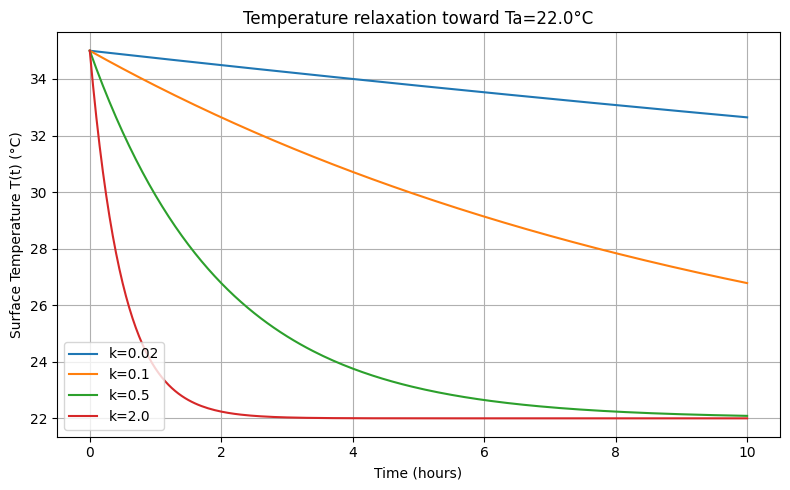

Done. The plot shows how different k values affect relaxation speed:
- small k: slow change (stays near initial 35°C longer)
- large k: fast approach to Ta



In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# --- Symbols and function ---
t, k, Ta = sp.symbols('t k Ta', positive=True, real=True)
T = sp.Function('T')

# ODE: dT/dt = -k (T - Ta)
ode = sp.Eq(sp.Derivative(T(t), t), -k*(T(t) - Ta))
ics = {T(0): 35}  # initial condition: T(0)=35 °C

# --- Solve symbolically ---
sol = sp.dsolve(ode, ics=ics)
Tt = sp.simplify(sol.rhs)  # symbolic T(t)

print("Symbolic solution for T(t):")
print(sp.pretty(Tt))
print("\n(alternative neat form)")
print("T(t) = Ta + (35 - Ta)*exp(-k*t)\n")

# --- Evaluate at k = 0.1, t = 5 ---
k_val = 0.1
t_val = 5
T_sub_expr = Tt.subs({k: k_val, t: t_val})
print(f"T(5) symbolic (k=0.1) = {sp.simplify(T_sub_expr)}\n")

# Numeric examples for chosen ambient temperatures
for Ta_val in (20, 25):
    T_num = float(sp.N(T_sub_expr.subs(Ta, Ta_val)))
    print(f"For Ta = {Ta_val} °C -> T(5) ≈ {T_num:.6f} °C")
print()

# --- Limits ---
lim_k_0 = sp.limit(Tt, k, 0)
lim_k_inf = sp.limit(Tt, k, sp.oo)
lim_t_inf = sp.limit(Tt, t, sp.oo)
print("Limit as k -> 0: T(t) ->", lim_k_0)
print("Limit as k -> ∞: T(t) ->", lim_k_inf)
print("Limit as t -> ∞ (finite k): T(t) ->", lim_t_inf)
print()

# --- Numeric plot for several k values ---
# Convert symbolic expression to a numeric lambda for plotting
Ta_val_plot = 22.0  # ambient temperature for plot (°C)
T_numeric_lambda = sp.lambdify((t, k, Ta), Tt, 'numpy')

t_vals = np.linspace(0, 10, 201)  # time from 0 to 10 hours
k_values = [0.02, 0.1, 0.5, 2.0]

plt.figure(figsize=(8,5))
for kv in k_values:
    y = T_numeric_lambda(t_vals, kv, Ta_val_plot)
    plt.plot(t_vals, y, label=f'k={kv}')

plt.xlabel('Time (hours)')
plt.ylabel('Surface Temperature T(t) (°C)')
plt.title(f'Temperature relaxation toward Ta={Ta_val_plot}°C')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Print final note ---
print("Done. The plot shows how different k values affect relaxation speed:\n"
      "- small k: slow change (stays near initial 35°C longer)\n"
      "- large k: fast approach to Ta\n")
